In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv3D, MaxPooling3D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
import h5py
import os
import dlib
import numpy as np
import cv2
print(tf.__version__)

2.5.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def registering(img1,img2):
  img1 = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
  img2 = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
  height,widht = img1.shape
  orb_detector = cv2.ORB_create(5000)
  kp1,d1 = orb_detector.detectAndCompute(img1,None)
  kp2,d2 = orb_detector.detectAnCompute(img2,None)
  matcher = cv2.BFMatcher(cv2.NORdM_Hamming,crossCheck=True)
  matches = matcher.match(d1,d2)
  matches.sort(key = lambda x: x.distance) 
  
  matches = matches[:int(len(matches)*90)] 
  no_of_matches = len(matches) 
    
  p1 = np.zeros((no_of_matches, 2)) 
  p2 = np.zeros((no_of_matches, 2)) 
    
  for i in range(len(matches)): 
    p1[i, :] = kp1[matches[i].queryIdx].pt 
    p2[i, :] = kp2[matches[i].trainIdx].pt 
    
  homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC) 
    
  transformed_img = cv2.warpPerspective(img1_color, 
                      homography, (width, height))
  return transformed_img

In [ ]:
datadir = 'drive/MyDrive/BTP - rakshak'
categories = ['Before Activity/videos', 'After Activity/videos']
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("drive/MyDrive/BTP - rakshak/shape_predictor_81_face_landmarks.dat")

#data = np.zeros((9,60,240,100),float)
data11 = []
z = 0

for cat in categories:
  path = os.path.join(datadir,cat)
  print(len(os.listdir(path)))
  for i in os.listdir(path):
    print(i)
    vid = cv2.VideoCapture(os.path.join(path,i))
    framecnt = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))
    # frameht = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
    # framewd = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
    fps = int(vid.get(cv2.CAP_PROP_FPS))
    #print(fps)
    #video = np.zeros((60,240,100),float)
    video = []
    #print(video.shape)
    x = 0
    face_rects = ()
    #x1=0
    x2=0
    x3=0 
    #y1=0
    #y2=0
    y6=0
    y7=0
    y=0
    #fr = np.zeros((240,100),float)
    w =0
    fr=np.zeros((100,100))
    while vid.isOpened():
      ret,frame = vid.read()
      
      #print(frame.shape)
      if ret != True:
        break
      green = frame[:, :, 1]
      if x%30 == 0 and x!=0:
        #video[y] = fr
        data11.append(np.array(video))
        video.clear()
        #video.append(fr)
        #fr = np.zeros((240,100),float)
        #y+=1
        #w=0
        #print(video[0])
        # gray = cv2.cvtColor(video[0], cv2.COLOR_RGB2GRAY)
        # faces = detector(gray)
        # #print(faces)
        # # print(faces)
        # # print(len(faces))
        # # print(framecnt)
        # for face in faces:
        #     x2 = face.right()
        #     landmarks = predictor(video[0], face)
        #     x3 = landmarks.part(17).x
        #     #y3 = landmarks.part(17).y
        #     #x4 = landmarks.part(19).x
        #     #y4 = landmarks.part(19).y
        #     #x5 = landmarks.part(26).x
        #     #y5 = landmarks.part(26).y
        #     #x6 = landmarks.part(70).x
        #     y6 = landmarks.part(70).y
        #     #x7 = landmarks.part(21).x
        #     y7 = landmarks.part(21).y
        #     if(y6 >= y7):
        #       y6 = y7-2
        #     if(x3>=x2):
        #       x3 = x2-2
        #     break
        # #print(y6,y7,x2,x3)
        # video2 = []
        # fr = video[0]
        # b = fr[:,:,1]
        # #print(a)
        # b = b[y6:y7,x3:x2]
        # #print(a)
        # b = cv2.resize(b,(100,100))
        # #a = a[:,:,1]
        # video2.append(np.array(b))
        # #print(np.array(b).shape)
        # #video2.append(np.array(video[0][y6:y7,x2:x3]))
        # for kk in range(1,30):
        #    a = video[kk]
        #    img1 = cv2.cvtColor(a,cv2.COLOR_BGR2GRAY)
        #     #print(img.shape,fr.shape)
        #     #print(fr)
        #    img2 = cv2.cvtColor(fr,cv2.COLOR_BGR2GRAY)
        #    height,width = img1.shape
        #    orb_detector = cv2.ORB_create(5000)
        #    kp1,d1 = orb_detector.detectAndCompute(img1,None)
        #    kp2,d2 = orb_detector.detectAndCompute(img2,None)
        #    matcher = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
        #    matches = matcher.match(d1,d2)
        #    matches.sort(key = lambda x: x.distance) 
            
        #    matches = matches[:int(len(matches)*90)] 
        #    no_of_matches = len(matches) 
        #    #print(no_of_matches)
        #    p1 = np.zeros((no_of_matches, 2)) 
        #    p2 = np.zeros((no_of_matches, 2)) 
             
        #    for i in range(len(matches)): 
        #      p1[i, :] = kp1[matches[i].queryIdx].pt 
        #      p2[i, :] = kp2[matches[i].trainIdx].pt 
        #     #print(p1,p2)  
        #    homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC) 
              
        #    a = cv2.warpPerspective(a, 
        #                         homography, (width, height))
        #    a = a[:,:,1]
        #    a = a[y6:y7,x3:x2]
        #    a = cv2.resize(a,(100,100))
        #   #  a = a-fr
        #    video2.append(np.array(a))

        # data11.append(np.array(video2))        
        # #print(np.array(data11).shape)
        # video.clear()

      if x == 1800:
        break
      if x == 0:
          gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
          faces = detector(gray)
          # print(faces)
          # print(len(faces))
          # print(framecnt)
          for face in faces:
              x2 = face.right()
              landmarks = predictor(frame, face)
              x3 = landmarks.part(17).x
              #y3 = landmarks.part(17).y
              #x4 = landmarks.part(19).x
              #y4 = landmarks.part(19).y
              #x5 = landmarks.part(26).x
              #y5 = landmarks.part(26).y
              #x6 = landmarks.part(70).x
              y6 = landmarks.part(70).y
              #x7 = landmarks.part(21).x
              y7 = landmarks.part(21).y
              if(y6 >= y7):
                y6 = y7-2
              if(x3>=x2):
                x3 = x2-2
              break
          samp = frame[y6:y7,x3:x2]
          # cv2.imwrite("roi"+str(z)+".png",samp)
      img11 = green[y6:y7, x3:x2]
      img11 = cv2.resize(img11,(100,100))
      if x%30 == 0:
        fr = img11;
      else:
        img11 = img11-fr
        img11 = img11*10;  

      video.append(np.array(img11))

      # if x%30 ==0:
      #   gr = frame[y6:y7,x3:x2]
      #   fr = cv2.resize(gr,(100,100))
      #   img11= fr[:,:,1]
      # else:
      #   img = cv2.resize(frame[y6:y7,x3:x2],(100,100))
      #   img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      #   #print(img.shape,fr.shape)
      #   #print(fr)
      #   img2 = cv2.cvtColor(fr,cv2.COLOR_BGR2GRAY)
      #   height,widht = img1.shape
      #   orb_detector = cv2.ORB_create(5000)
      #   kp1,d1 = orb_detector.detectAndCompute(img1,None)
      #   kp2,d2 = orb_detector.detectAndCompute(img2,None)
      #   matcher = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
      #   matches = matcher.match(d1,d2)
      #   matches.sort(key = lambda x: x.distance) 
        
      #   matches = matches[:int(len(matches)*90)] 
      #   no_of_matches = len(matches) 
      #   print(no_of_matches)
      #   p1 = np.zeros((no_of_matches, 2)) 
      #   p2 = np.zeros((no_of_matches, 2)) 
          
      #   for i in range(len(matches)): 
      #     p1[i, :] = kp1[matches[i].queryIdx].pt 
      #     p2[i, :] = kp2[matches[i].trainIdx].pt 
      #   #print(p1,p2)  
      #   homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC) 
          
      #   img11 = cv2.warpPerspective(img1_color, 
      #                       homography, (width, height))
      #   img11=img11[:,:,1]        
      #print(img11.shape)
      #img1 = np.zeros((8,100,3),float)
      # if x%30 == 0:
      #   img1 = img11
      #   fr[0:8,:] = img1[:,:,1]
      # else: 
      #   img2 = register_image(img1,img11)
      #   fr[8*w:8*(w+1),:] = img2
      #video[x] = img1


      #video.append(frame)
      
      
      #w+=1
      # del img1
      # del frame
      x=x+1
    #data11.append(np.array(video))
    #data11.append(video)
    z+=1
    vid.release()
    #break
#print(data)
data = np.array(data11)
print(data.shape)

4
001_before_sleep.mp4
005_before_lecture.mp4
003_before_lunch.mp4
002_before_sleep.mp4
6
001_aftersleep.mp4
003_after_bath.mp4
004_after_dinner.mp4
005_after_breakfast.mp4
008_after_lunch.mp4
009_sitting_idle.mp4
(600, 30, 100, 100)


In [ ]:
#print(data)
# print(data.shape)
# np.reshape(data,(100,100,540,30),order='A')
# print(data.shape)
data11 = []
for i in range(data.shape[0]):
  data11.append(data[i].reshape(100,100,30,1))
data = np.array(data11)
print(data.shape)
#print(data)

(600, 100, 100, 30, 1)


In [ ]:
import csv
#csv1 = np.zeros((9,60),float)
csv11 = []
datadir = 'drive/MyDrive/BTP - rakshak'
z = 0
pategories = ['Before Activity/csv', 'After Activity/csv']
for cat in pategories:
  path2 = os.path.join(datadir,cat)
  print(len(os.listdir(path2)))
  
  for i in os.listdir(path2):
    print(i)
    with open(os.path.join(path2,i)) as csv_file:
      csv_reader = csv.reader(csv_file, delimiter=',')
      x = 0
      y = np.zeros((60),float)
      for row in csv_reader:
        x+=1
        if x == 1:
          continue
        if(x == 62):
          break
        # dat = np.zeros(1,float)
        # dat[0]=row[3]
        # dat[1]=row[3]
        # dat[2]=row[4]
        #dat = float(row[3])
        k = []
        k.append(float(row[2]))
        k.append(float(row[3]))
        k.append(float(row[4]))
        csv11.append(np.array(k))
        # csv11.append(float(row[2]))
        #y[x-2] = dat
        #print(y)
      csv_file.flush()  
    csv1 = np.array(csv11)
    z+=1

4
002_before_sleep.csv
001_before_sleep.csv
003_before_lunch.csv
005_before_lecture.csv
6
004_after_dinner.csv
005_after_breakfast.csv
003_after_bath.csv
008_after_lunch.csv
001_aftersleep.csv
009_sitting_idle.csv


In [ ]:
print(data.shape)
print(csv1.shape)
data2 = data

(600, 100, 100, 30, 1)
(600, 3)


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(5,True,1)
Sp = kf.split(data2)
kfold_train_x = []
kfold_train_y= []
kfold_test_x = []
kfold_test_y = []
for train,test in Sp:
  kfold_train_x.append(data[train])
  kfold_train_y.append(csv1[train])
  kfold_test_x.append(data[test])
  kfold_test_y.append(csv1[test])
kfold_train_x = np.array(kfold_train_x)
kfold_train_y= np.array(kfold_train_y)
kfold_test_x = np.array(kfold_test_x)
kfold_test_y = np.array(kfold_test_y)
print(kfold_train_x.shape)
print(kfold_train_y.shape)
print(kfold_test_x.shape)
print(kfold_test_y.shape)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(5,True,1)
Sp = kf.split(data2)
for train,test in Sp:
    kfold_train_x, kfold_train_y,kfold_test_x,kfold_test_y = data[train],csv1[train],data[test],csv1[test]
    #print(kfold_train_x.shape,kfold_train_y.shape,kfold_test_x.shape,kfold_test_y.shape)
    model.compile(loss="mean_absolute_percentage_error", optimizer='adam')
    model.fit(x=kfold_train_x,y=kfold_train_y,validation_data=(kfold_test_x,kfold_test_y),epochs=200,verbose=2)
    print(model.evaluate(kfold_test_x,kfold_test_y))

In [ ]:
#data = data/255.0

from sklearn.model_selection import train_test_split
split = train_test_split(csv1, data, test_size=0.3)
(trainAttrX, testAttrX, trainImagesX, testImagesX) = split
print(trainAttrX.shape)
print(trainImagesX.shape)

(420, 3)
(420, 100, 100, 30, 1)


In [ ]:
from tensorflow.keras.layers import InputLayer,GlobalAveragePooling3D
from keras.layers.convolutional import Convolution3D,MaxPooling3D
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(InputLayer((100,100,30,1)))
model.add(Convolution3D(filters = 16,kernel_size =(3,3,3),padding='same',activation='relu'))
model.add(MaxPooling3D(pool_size=(2,2,2)))
model.add(BatchNormalization())
model.add(Convolution3D(filters = 32,kernel_size=(3,3,3),padding='same',activation='relu'))
model.add(MaxPooling3D(pool_size=(2,2,2)))
model.add(BatchNormalization())
model.add(Convolution3D(filters = 64,kernel_size=(3,3,3),padding='same',activation = 'relu'))
model.add(MaxPooling3D(pool_size=(2,2,2)))
model.add(BatchNormalization())
model.add(Convolution3D(filters = 128,kernel_size = (3,3,3),padding='same',activation = 'relu'))
model.add(MaxPooling3D(pool_size = (2,2,2)))
model.add(BatchNormalization())
model.add(GlobalAveragePooling3D())
model.add(Dense(units = 100,activation = 'elu'))
model.add(Dense(units = 1,activation = 'elu'))

In [ ]:
from tensorflow.keras.optimizers import Adam
# opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mean_absolute_percentage_error", optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 100, 100, 30, 16)  448       
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 50, 50, 15, 16)    0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 50, 50, 15, 16)    64        
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 50, 50, 15, 32)    13856     
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 25, 25, 7, 32)     0         
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 25, 25, 7, 32)     128       
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 25, 25, 7, 64)     5

In [ ]:
#maxPrice = trainAttrX.max()
trainY = trainAttrX 

testY = testAttrX

In [ ]:
model.fit(x=trainImagesX, y=trainY[:,1], 
    validation_data=(testImagesX, testY[:,1]),
    epochs=200,verbose = 2)

Epoch 1/200
14/14 - 37s - loss: 95.1065 - val_loss: 28.9848
Epoch 2/200
14/14 - 3s - loss: 86.0149 - val_loss: 24.3391
Epoch 3/200
14/14 - 3s - loss: 75.3497 - val_loss: 181.9263
Epoch 4/200
14/14 - 3s - loss: 61.9941 - val_loss: 380.8132
Epoch 5/200
14/14 - 3s - loss: 50.5887 - val_loss: 754.6644
Epoch 6/200
14/14 - 3s - loss: 42.8700 - val_loss: 978.4911
Epoch 7/200
14/14 - 3s - loss: 37.9767 - val_loss: 465.2617
Epoch 8/200
14/14 - 3s - loss: 33.3564 - val_loss: 462.3239
Epoch 9/200
14/14 - 3s - loss: 32.0574 - val_loss: 399.7253
Epoch 10/200
14/14 - 3s - loss: 34.4187 - val_loss: 230.2042
Epoch 11/200
14/14 - 3s - loss: 31.8482 - val_loss: 305.9709
Epoch 12/200
14/14 - 3s - loss: 26.6260 - val_loss: 202.2593
Epoch 13/200
14/14 - 3s - loss: 24.0389 - val_loss: 186.4561
Epoch 14/200
14/14 - 3s - loss: 25.5176 - val_loss: 177.7607
Epoch 15/200
14/14 - 3s - loss: 21.9616 - val_loss: 133.3127
Epoch 16/200
14/14 - 3s - loss: 20.6349 - val_loss: 104.3383
Epoch 17/200
14/14 - 3s - loss: 21

In [ ]:
catt = 'test/videos/test1.mp4'
categories1 = ['test/videos']
data2 = []

# for cat in categories1:
path = os.path.join(datadir,catt)
#   print(len(os.listdir(path)))
#   for i in os.listdir(path):
#     print(i)
vid = cv2.VideoCapture(path)
framecnt = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))
fps = int(vid.get(cv2.CAP_PROP_FPS))
#print(fps)
#video = np.zeros((60,240,100),float)
video = []
#print(video.shape)
x = 0
face_rects = ()
#x1=0
x2=0
x3=0 
#y1=0
#y2=0
y6=0
y7=0
y=0
#fr = np.zeros((240,100),float)
w =0
fr=np.zeros((100,100))

while vid.isOpened():
  ret,frame = vid.read()
  
  #print(frame.shape)
  if ret != True:
    break
  green = frame[:, :, 1]
  if x%30 == 0 and x!=0:
    #video[y] = fr
    data2.append(np.array(video))
    video.clear()

  if x == 1800:
    break
  if x == 0:
      gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
      faces = detector(gray)
      # print(len(faces))
      for face in faces:
          x2 = face.right()
          # print(x2)
          landmarks = predictor(frame, face)
          x3 = landmarks.part(17).x
          y6 = landmarks.part(70).y
          y7 = landmarks.part(21).y
          # print(x3)
          # print(y6,y7)
          if(y6 >= y7):
            y6 = y7-2
          if(x3>=x2):
            x3 = x2-2
          break
      samp = frame[y6:y7,x3:x2]
  # print(y6,y7,x3,x2)
  img11 = green[y6:y7, x3:x2]
  # print(img11)
  img11 = cv2.resize(img11,(100,100))
  if x%30 == 0:
    fr = img11
  else:
    img11 = img11-fr
    img11 = img11*10;  
  # print(x)
  video.append(np.array(img11))
  x=x+1
z+=1 
vid.release()
#break
#print(data)
data_test = np.array(data2)
print(data_test.shape)


(60, 30, 100, 100)


In [ ]:
catt = 'test/videos/test2.mp4'
categories1 = ['test/videos']
data2 = []

# for cat in categories1:
path = os.path.join(datadir,catt)
#   print(len(os.listdir(path)))
#   for i in os.listdir(path):
#     print(i)
vid = cv2.VideoCapture(path)
framecnt = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))
fps = int(vid.get(cv2.CAP_PROP_FPS))
#print(fps)
#video = np.zeros((60,240,100),float)
video = []
#print(video.shape)
x = 0
face_rects = ()
#x1=0
x2=0
x3=0 
#y1=0
#y2=0
y6=0
y7=0
y=0
#fr = np.zeros((240,100),float)
w =0
fr=np.zeros((100,100))

while vid.isOpened():
  ret,frame = vid.read()
  
  #print(frame.shape)
  if ret != True:
    break
  green = frame[:, :, 1]
  if x%30 == 0 and x!=0:
    #video[y] = fr
    data2.append(np.array(video))
    video.clear()

  if x == 1800:
    break
  if x == 0:
      gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
      faces = detector(gray)
      # print(len(faces))
      for face in faces:
          x2 = face.right()
          # print(x2)
          landmarks = predictor(frame, face)
          x3 = landmarks.part(17).x
          y6 = landmarks.part(70).y
          y7 = landmarks.part(21).y
          # print(x3)
          # print(y6,y7)
          if(y6 >= y7):
            y6 = y7-2
          if(x3>=x2):
            x3 = x2-2
          break
      samp = frame[y6:y7,x3:x2]
  # print(y6,y7,x3,x2)
  img11 = green[y6:y7, x3:x2]
  # print(img11)
  img11 = cv2.resize(img11,(100,100))
  if x%30 == 0:
    fr = img11
  else:
    img11 = img11-fr
    img11 = img11*10;  
  # print(x)
  video.append(np.array(img11))
  x=x+1
z+=1
vid.release()
#break
#print(data)
data_test2 = np.array(data2)
print(data_test2.shape)

(60, 30, 100, 100)


In [ ]:
csv22 = []
datadir = 'drive/MyDrive/BTP - rakshak'
z = 0
pategories = 'test/csv/test1.csv'
# for cat in pategories:
#   path2 = os.path.join(datadir,cat)
#   print(len(os.listdir(path2)))
  
#   for i in os.listdir(path2):
#     print(i)
with open(os.path.join(datadir,pategories)) as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  x = 0
  y = np.zeros((60),float)
  for row in csv_reader:
    x+=1
    if x == 1:
      continue
    if(x == 62):
      break
    # dat = np.zeros(1,float)
    # dat[0]=row[3]
    # dat[1]=row[3]
    # dat[2]=row[4]
    #dat = float(row[3])
    k = []
    k.append(float(row[2]))
    k.append(float(row[3]))
    # k.append(float(row[4]))
    csv22.append(np.array(k))
    # csv22.append(float(row[2]))
    #y[x-2] = dat
    #print(y)
  csv_file.flush()  
csv2 = np.array(csv22)
z+=1

In [ ]:
csv22 = []
datadir = 'drive/MyDrive/BTP - rakshak/'
z = 0
pategories = 'test/csv/test2.csv'
# for cat in pategories:
#   path2 = os.path.join(datadir,cat)
#   print(len(os.listdir(path2)))
  
#   for i in os.listdir(path2):
#     print(i)
with open(os.path.join(datadir,pategories)) as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  x = 0
  y = np.zeros((60),float)
  for row in csv_reader:
    x+=1
    if x == 1:
      continue
    if(x == 62):
      break
    # dat = np.zeros(1,float)
    # dat[0]=row[3]
    # dat[1]=row[3]
    # dat[2]=row[4]
    #dat = float(row[3])
    k = []
    k.append(float(row[2]))
    k.append(float(row[3]))
    # k.append(float(row[4]))
    csv22.append(np.array(k))
    # csv22.append(float(row[2]))
    #y[x-2] = dat
    #print(y)
  csv_file.flush()  
csv3 = np.array(csv22)
z+=1

In [ ]:
print(len(csv3))
print(len(csv2))

60
60


In [ ]:
data12 = []
print(data_test.shape)
for i in range(data_test.shape[0]):
  data12.append(data_test[i].reshape(100,100,30,1))
data_test = np.array(data12)
print(data_test.shape)

(60, 30, 100, 100)
(60, 100, 100, 30, 1)


In [ ]:
data12 = []
print(data_test2.shape)
for i in range(data_test2.shape[0]):
  data12.append(data_test2[i].reshape(100,100,30,1))
data_test2 = np.array(data12)
print(data_test2.shape)

(60, 30, 100, 100)
(60, 100, 100, 30, 1)


In [ ]:
# print(csv2.shape)
# print(data_test.shape)
print(csv3.shape)
print(data_test2.shape)

(60, 2)
(60, 100, 100, 30, 1)


In [ ]:
# model.summary()
# print(csv2[0])
preds1 = model.predict(data_test)
abspercentdiff1 = np.abs((preds1-csv2[:,1])/csv2[:,1] * 100) 
preds2 = model.predict(data_test2)
abspercentdiff2 = np.abs((preds2-csv3[:,1])/csv3[:,1] * 100)
# print(preds)
#print(testY*maxPrice)
np.savetxt("preds1.txt",preds1)
np.savetxt("preds2.txt",preds2)

# print(np.mean(abspercentdiff1))
# print(np.std(abspercentdiff1))
print(np.mean(abspercentdiff2))
print(np.std(abspercentdiff2))

10.809217271091564
5.229233957890665


In [ ]:
import numpy as np
Array = np.array(preds)
  
# Displaying the array
print('Array:\n', Array)
file = open("heartbeat.txt", "w+")
  
# Saving the array in a text file
content = str(Array)
file.write(content)
file.close()
  
# Displaying the contents of the text file
file = open("heartbeat.txt", "r")
content = file.read()
  
print("\nContent in heartbeat.txt:\n", content)
file.close()

NameError: ignored

In [ ]:
import numpy as np
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr,spearmanr
data1 = np.zeros((600,3),float)
ct =  0
# print(data1.shape)
# for i in csv1:
#   for j in i:
#     data1[ct] = j
#     ct+=1
# print(csv1[0])
# calculate covariance matrix
covariance = cov(csv1[:,1], csv1[:,0])
pers = pearsonr(csv1[:,1],csv1[:,0])
spea = spearmanr(csv1[:,1],csv1[:,0])
# for i in data1:  
# print(csv1[:,1])
#   print(i)
print(covariance)
print(pers)
print(spea)
X = csv1[:,1]
Y = csv1[:,0]

[[103.44235949  -3.84840289]
 [ -3.84840289   0.73388703]]
(-0.4416891347832858, 4.829677333802547e-30)
SpearmanrResult(correlation=-0.4422490107448464, pvalue=4.013398771172129e-30)


In [ ]:
print(X.shape)
print(Y.shape)

(600,)
(600,)


In [ ]:
model1 = Sequential()
model1.add(Dense(1, input_dim=1, kernel_initializer='normal', activation='sigmoid'))
model1.add(Dense(8,activation = 'sigmoid'))
model1.add(Dense(1,kernel_initializer='normal'))
model1.compile(loss='mse', optimizer='adam',metrics=['mae'])
model1.fit(X,Y,validation_split= 0.2,epochs= 1000)

Epoch 1/1000
15/15 [==============================] - 0s 10ms/step - loss: 9803.7686 - mae: 99.0100 - val_loss: 9688.2061 - val_mae: 98.4274
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 9789.3525 - mae: 98.9371 - val_loss: 9673.8242 - val_mae: 98.3543
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 9774.7725 - mae: 98.8634 - val_loss: 9659.1709 - val_mae: 98.2798
Epoch 4/1000
15/15 [==============================] - 0s 3ms/step - loss: 9759.8291 - mae: 98.7878 - val_loss: 9644.0469 - val_mae: 98.2028
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 9744.3164 - mae: 98.7093 - val_loss: 9628.2354 - val_mae: 98.1223
Epoch 6/1000
15/15 [==============================] - 0s 3ms/step - loss: 9727.8955 - mae: 98.6261 - val_loss: 9611.2598 - val_mae: 98.0358
Epoch 7/1000
15/15 [==============================] - 0s 3ms/step - loss: 9710.6006 - mae: 98.5383 - val_loss: 9593.9131 - val_mae: 97.9473
Epoch 8/1000
15/15 

In [ ]:
# catt = 'Dataset_thermal_Camera-20210620T125733Z-001/videos/test2.mp4'
categories1 = '/Dataset_thermal_Camera-20210620T125733Z-001/Dataset_thermal_Camera/Data Collection/Both RGB and Thermal/RGB'
names = []
reject = ['75.mp4','98.mp4','87.mp4','47.mp4','45.mp4','57.mp4','63.mp4','62.mp4','60.mp4','72.mp4','67.mp4','71.mp4','68.mp4','64.mp4','85.mp4','82.mp4','74.mp4','79.mp4','97.mp4']
data_test2 = []
for cat in os.listdir('/content/drive/MyDrive/BTP - rakshak/Dataset_thermal_Camera-20210620T125733Z-001/Dataset_thermal_Camera/Data collection/Both RGB and Thermal/RGB'):
  path = os.path.join('/content/drive/MyDrive/BTP - rakshak/Dataset_thermal_Camera-20210620T125733Z-001/Dataset_thermal_Camera/Data collection/Both RGB and Thermal/RGB/',cat)
  print(cat)
  # print(len(os.listdir('/content/drive/MyDrive/BTP - rakshak/Dataset_thermal_Camera-20210620T125733Z-001/Dataset_thermal_Camera/Data collection/Both RGB and Thermal/RGB')))
  if cat in reject :
    continue
  else :
    names.append(cat)
  testdata = []
  vid = cv2.VideoCapture(path)
  framecnt = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))
  fps = int(vid.get(cv2.CAP_PROP_FPS))
  #print(fps)
  #video = np.zeros((60,240,100),float)
  video = []
  #print(video.shape)
  x = 0
  face_rects = ()
  #x1=0
  x2=0
  x3=0 
  #y1=0
  #y2=0
  y6=0
  y7=0
  y=0
  #fr = np.zeros((240,100),float)
  w =0
  fr=np.zeros((100,100))

  while vid.isOpened():
    ret,frame = vid.read()
    
    #print(frame.shape)
    if ret != True:
      print(x)
      break
    green = frame[:, :, 1]
    if x%30 == 0 and x!=0:
      #video[y] = fr
      testdata.append(np.array(video))
      video.clear()

    if x == 1800:
      break
    if x == 0:
        gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        faces = detector(gray)
        # print(len(faces))
        for face in faces:
            x2 = face.right()
            # print(x2)
            landmarks = predictor(frame, face)
            x3 = landmarks.part(17).x
            y6 = landmarks.part(70).y
            y7 = landmarks.part(21).y
            # print(x3)
            # print(y6,y7)
            if(y6 >= y7):
              y6 = y7-2
            if(x3>=x2):
              x3 = x2-2
            break
        samp = frame[y6:y7,x3:x2]
    # print(y6,y7,x3,x2)
    img11 = green[y6:y7, x3:x2]
    # print(img11)
    img11 = cv2.resize(img11,(100,100))
    if x%30 == 0:
      fr = img11
    else:
      img11 = img11-fr
      img11 = img11*10;  
    # print(x)
    video.append(np.array(img11))
    x=x+1
  z+=1
  data_test2.append(np.array(testdata))
  print(np.array(testdata).shape)
  vid.release()
  testdata.clear()
  #break
  #print(data)
# data_pest2= np.array(data_test2)
# print(data_pest2.shape)

98.mp4
97.mp4
99.mp4
293
(9, 30, 100, 100)
92.mp4
39
(1, 30, 100, 100)
93.mp4
75
(2, 30, 100, 100)
90.mp4
193
(6, 30, 100, 100)
91.mp4
165
(5, 30, 100, 100)
76.mp4
49
(1, 30, 100, 100)
84.mp4
39
(1, 30, 100, 100)
85.mp4
71.mp4
75.mp4
95.mp4
285
(9, 30, 100, 100)
96.mp4
264
(8, 30, 100, 100)
94.mp4
557
(18, 30, 100, 100)
82.mp4
77.mp4
65
(2, 30, 100, 100)
87.mp4
83.mp4
64
(2, 30, 100, 100)
74.mp4
72.mp4
67.mp4
45.mp4
89.mp4
347
(11, 30, 100, 100)
36.mp4
85
(2, 30, 100, 100)
88.mp4
307
(10, 30, 100, 100)
63.mp4
62.mp4
48.mp4
198
(6, 30, 100, 100)
47.mp4
43.mp4
197
(6, 30, 100, 100)
78.mp4
277
(9, 30, 100, 100)
79.mp4
64.mp4
68.mp4
60.mp4
44.mp4
200
(6, 30, 100, 100)
54.mp4
397
(13, 30, 100, 100)
58.mp4
533
(17, 30, 100, 100)
56.mp4
293
(9, 30, 100, 100)
50.mp4
403
(13, 30, 100, 100)
42.mp4
176
(5, 30, 100, 100)
51.mp4
314
(10, 30, 100, 100)
57.mp4
40.mp4
520
(17, 30, 100, 100)


In [ ]:
# print(len(data_test2[0]))
datav = []

for (i,p) in enumerate(data_test2):
  # print(len(p))
  # print(p)
  data12 = []
  for j in range(len(p)):
    data12.append(data_test2[i][j].reshape(100,100,30,1))
  datav.append(np.array(data12))
# data_test2 = np.array(data_test2)
# print(data_test2.shape)
# for i in datav:
#   print(i.shape)

In [ ]:
predictions = []
from statistics import mean
for i in datav:
  predictions.append(model.predict(i))
avg_heartrates = []
for i in predictions:
  avg_heartrates.append(mean(i.flatten()))
print(avg_heartrates)  

[85.45978, 90.522934, 87.050186, 84.19508, 81.25626, 88.06707, 87.94596, 84.75593, 73.67906, 74.7538, 83.80186, 91.0653, 81.76456, 78.79376, 83.55904, 84.40661, 84.77571, 82.58121, 84.36797, 78.91361, 75.03585, 82.63564, 81.72635, 85.03304, 82.73918, 86.25039]


In [ ]:
spo2s = []
from statistics import mean
for i in predictions:
  spo2s.append(model1.predict(i))
# print(spo2s)
spo2_avg = []
for i in spo2s:
  spo2_avg.append(mean(i.flatten()))
print(spo2_avg)

[98.945694, 98.9457, 98.945694, 98.945694, 98.945694, 98.9457, 98.9457, 98.945694, 98.945694, 98.9456, 98.945694, 98.945694, 98.945694, 98.945694, 98.945694, 98.945694, 98.945694, 98.945694, 98.945694, 98.945694, 98.945595, 98.945694, 98.945694, 98.945694, 98.945694, 98.9457]


In [ ]:
import csv
validation_information = '/content/drive/MyDrive/BTP - rakshak/Dataset_thermal_Camera-20210620T125733Z-001/Dataset_thermal_Camera/Data collection/vli.csv'
vi = []
dic = {}
with open(validation_information) as csv_file:
  csv_reader = csv.reader(csv_file,delimiter=',')
  for (i,row) in enumerate(csv_reader):
    if i < 1:
      continue
    if i >=100:
      break
    # print(i)
    # temp_arr = []
    # temp_arr.append(row[0]+'.mp4')
    # temp_arr.append((float(row[15])+float(row[16]))/2)
    # temp_arr.append((float(row[17])+float(row[18]))/2)
    # vi.append(temp_arr)
    dic[row[0]+'.mp4'] = (float(row[15])+float(row[16]))/2 , (float(row[16])+float(row[18]))/2
print(len(vi))
row1 = ['name','spo2 predicted','heartrate predicted','spo2 actual','heart rate actual']
# print(vi[:,0])
with open('output.csv','w') as csv_file:
  csv_writer = csv.writer(csv_file)
  csv_writer.writerow(row1)
  for (i,val) in enumerate(spo2s):
    for (j,row) in enumerate(val): 
      row1 = []
      row1.append(names[i])
      row1.append(spo2s[j])
      row1.append(predictions[j])
      print(names[i])
      row1.append(dic[names[i]][0])
      row1.append(dic[names[i]][1])
      csv_writer.writerow(row1) 

0
99.mp4
99.mp4
99.mp4
99.mp4
99.mp4
99.mp4
99.mp4
99.mp4
99.mp4
92.mp4
93.mp4
93.mp4
90.mp4
90.mp4
90.mp4
90.mp4
90.mp4
90.mp4
91.mp4
91.mp4
91.mp4
91.mp4
91.mp4
76.mp4
84.mp4
95.mp4
95.mp4
95.mp4
95.mp4
95.mp4
95.mp4
95.mp4
95.mp4
95.mp4
96.mp4
96.mp4
96.mp4
96.mp4
96.mp4
96.mp4
96.mp4
96.mp4
94.mp4
94.mp4
94.mp4
94.mp4
94.mp4
94.mp4
94.mp4
94.mp4
94.mp4
94.mp4
94.mp4
94.mp4
94.mp4
94.mp4
94.mp4
94.mp4
94.mp4
94.mp4
77.mp4
77.mp4
83.mp4
83.mp4
89.mp4
89.mp4
89.mp4
89.mp4
89.mp4
89.mp4
89.mp4
89.mp4
89.mp4
89.mp4
89.mp4
36.mp4
36.mp4
88.mp4
88.mp4
88.mp4
88.mp4
88.mp4
88.mp4
88.mp4
88.mp4
88.mp4
88.mp4
48.mp4
48.mp4
48.mp4
48.mp4
48.mp4
48.mp4
43.mp4
43.mp4
43.mp4
43.mp4
43.mp4
43.mp4
78.mp4
78.mp4
78.mp4
78.mp4
78.mp4
78.mp4
78.mp4
78.mp4
78.mp4
44.mp4
44.mp4
44.mp4
44.mp4
44.mp4
44.mp4
54.mp4
54.mp4
54.mp4
54.mp4
54.mp4
54.mp4
54.mp4
54.mp4
54.mp4
54.mp4
54.mp4
54.mp4
54.mp4
58.mp4
58.mp4
58.mp4
58.mp4
58.mp4
58.mp4
58.mp4
58.mp4
58.mp4
58.mp4
58.mp4
58.mp4
58.mp4
58.mp4
58.mp4
58.m

In [ ]:
test_X = np.zeros((182,2),float)
test_Y = np.zeros((182,1),float)
x = 0
with open(os.path.join(datadir,'Before Activity/test.csv')) as csv_file:
  csvv = csv.reader(csv_file,delimiter = ',')
  for row in csvv:
    x+=1
    if x == 1:
      continue
    test_X[x-2][0] = row[3]
    test_X[x-2][1] = row[4]
    test_Y[x-2][0] = row[2]
print(test_X)
print(test_Y)  

In [ ]:
Spo2_1 = model1.predict(preds1)
# print(preds)
abspercentdiff_1 = np.abs((Spo2_1-csv2[:,0])/csv2[:,0] * 100) 
Spo2_2 = model1.predict(preds2)
# print(preds)
abspercentdiff_2 = np.abs((Spo2_1-csv3[:,0])/csv3[:,0] * 100) 
np.savetxt("spo2_1.txt",Spo2_1)
np.savetxt("spo2_2.txt",Spo2_2)
# print(preds)
#print(testY*maxPrice)
# print(Spo2)
# print(csv2[:,0])
# print(np.mean(abspercentdiff_1))
# print(np.std(abspercentdiff_1))
print(np.mean(abspercentdiff_2))
print(np.std(abspercentdiff_2))

0.965001631756218
0.0


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


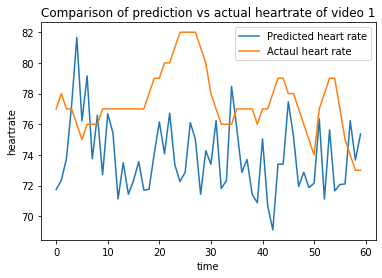

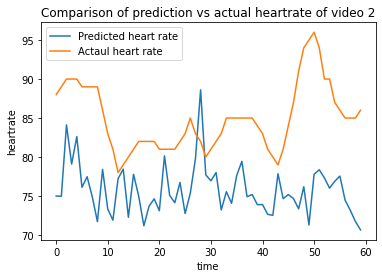

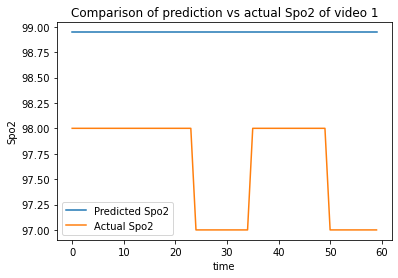

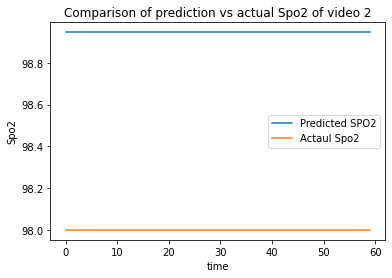

In [ ]:
import matplotlib.pyplot as plt
x = []
i = 0
while i < 60:
  x.append(i)
  i+=1
xx = np.array(x)
print(x)  
plt.plot(x,preds1 ,label = "Predicted heart rate")
plt.plot(x,csv2[:,1],label = "Actaul heart rate") 
plt.xlabel('time')
# naming the y axis
plt.ylabel('heartrate')
# giving a title to my graph
plt.title('Comparison of prediction vs actual heartrate of video 1')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.savefig("preds1.png")
plt.show()
# print(preds1)
# print(csv2[:,1]) 

plt.plot(x,preds2 ,label = "Predicted heart rate")
plt.plot(x,csv3[:,1],label = "Actaul heart rate") 
plt.xlabel('time')
# naming the y axis
plt.ylabel('heartrate')
# giving a title to my graph
plt.title('Comparison of prediction vs actual heartrate of video 2')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.savefig("preds2.png")
plt.show()
# print(preds1)
# print(csv2[:,1]) 

plt.plot(x,Spo2_1 ,label = "Predicted Spo2")
plt.plot(x,csv2[:,0],label = "Actual Spo2") 
plt.xlabel('time')
# naming the y axis
plt.ylabel('Spo2')
# giving a title to my graph
plt.title('Comparison of prediction vs actual Spo2 of video 1')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.savefig("spo21.png")
plt.show()
# print(preds1)
# print(csv2[:,1]) 

plt.plot(x,Spo2_2 ,label = "Predicted SPO2")
plt.plot(x,csv3[:,0],label = "Actaul Spo2") 
plt.xlabel('time')
# naming the y axis
plt.ylabel('Spo2')
# giving a title to my graph
plt.title('Comparison of prediction vs actual Spo2 of video 2')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.savefig("Spo22.png")
plt.show()
# print(preds1)
# print(csv2[:,1]) 
# # naming the x axis
# plt.xlabel('x - axis')
# # naming the y axis
# plt.ylabel('y - axis')

In [ ]:
import numpy as np
Array = np.array(Spo2)
  
# Displaying the array
print('Array:\n', Array)
file = open("Spo2.txt", "w+")
  
# Saving the array in a text file
content = str(Array)
file.write(content)
file.close()
  
# Displaying the contents of the text file
file = open("Spo2.txt", "r")
content = file.read()
  
print("\nContent in Spo2.txt:\n", content)
file.close()

In [ ]:
catt = 'test/videos/test1.mp4'
final= []
path = os.path.join(datadir,catt)
vid = cv2.VideoCapture(path)
framecnt = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))
fps = int(vid.get(cv2.CAP_PROP_FPS))
video = []
x = 0
face_rects = ()

x2=0
x3=0 
y6=0
y7=0
y=0
w =0
fr=np.zeros((100,100))

while vid.isOpened():
  ret,frame = vid.read()
  
  #print(frame.shape)
  if ret != True:
    break
  # green = frame[:, :, 1]
  if x%30 == 0 and x!=0:
    #video[y] = fr
    # data2.append(np.array(video))
    final.append(np.array(video))
    video.clear()

  if x == 1800:
    break
  if x == 0:
      gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
      faces = detector(gray)
      for face in faces:
          x2 = face.right()
          landmarks = predictor(frame, face)
          x3 = landmarks.part(17).x
          y6 = landmarks.part(70).y
          y7 = landmarks.part(21).y
          if(y6 >= y7):
            y6 = y7-2
          if(x3>=x2):
            x3 = x2-2
          break
  frame = cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)        
  cv2.rectangle(frame,(x3,y6),(x2,y7),(0,255,0),2)
  font = cv2.FONT_HERSHEY_SIMPLEX
    
  fontScale = 1
  color = (255, 0, 0)
  thickness = 2
  frame = cv2.putText(frame,'Spo2 = '+str(Spo2_1[x//30]),(x3,y6), font, 
                    1, (255,0,0), 2, cv2.LINE_AA) 
  frame = cv2.putText(frame,'Heartrate '+str(preds1[x//30]),(x3,y7), font, 
                    1, (255,0,0), 2, cv2.LINE_AA) 
  cv2.resize(frame,(256,256))
  # cv2.imwrite(str(x)+'.png',frame)
  # video.append(np.array(frame))
  x=x+1
z+=1
vid.release()

# final = np.array(final)
# print(final.shape)


In [ ]:
fourcc = cv2.VideoWriter_fourcc('M', 'J', 'P', 'G')
out = cv2.VideoWriter('output1.avi', fourcc, fps, (1280, 720), 0)
 
for i in range(len(final)):
    for j in range(len(final[i])):
      fr = final[i][j]
      fr = np.uint8(fr)
      out.write(fr)
out.release()

In [ ]:
catt = 'test/videos/test2.mp4'
final= []
path = os.path.join(datadir,catt)
vid = cv2.VideoCapture(path)
framecnt = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))
fps = int(vid.get(cv2.CAP_PROP_FPS))
video = []
x = 0
face_rects = ()

x2=0
x3=0 
y6=0
y7=0
y=0
w =0
fr=np.zeros((100,100))

while vid.isOpened():
  ret,frame = vid.read()
  
  #print(frame.shape)
  if ret != True:
    break
  # green = frame[:, :, 1]
  if x%30 == 0 and x!=0:
    #video[y] = fr
    # data2.append(np.array(video))
    final.append(np.array(video))
    video.clear()

  if x == 1800:
    break
  if x == 0:
      gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
      faces = detector(gray)
      for face in faces:
          x2 = face.right()
          landmarks = predictor(frame, face)
          x3 = landmarks.part(17).x
          y6 = landmarks.part(70).y
          y7 = landmarks.part(21).y
          if(y6 >= y7):
            y6 = y7-2
          if(x3>=x2):
            x3 = x2-2
          break
  frame = cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)        
  cv2.rectangle(frame,(x3,y6),(x2,y7),(0,255,0),2)
  font = cv2.FONT_HERSHEY_SIMPLEX
    
  fontScale = 1
  color = (255, 0, 0)
  thickness = 2
  frame = cv2.putText(frame,'Spo2 = '+str(Spo2_2[x//30]),(x3,y6), font, 
                    1, (255,0,0), 2, cv2.LINE_AA) 
  frame = cv2.putText(frame,'Heartrate '+str(preds2[x//30]),(x3,y7), font, 
                    1, (255,0,0), 2, cv2.LINE_AA)
  cv2.resize(frame,(256,256))
  # cv2.imwrite(str(x)+'.png',frame)
  video.append(np.array(frame))
  x=x+1
z+=1
vid.release()

final = np.array(final)
print(final.shape)


(60, 30, 720, 1280)


In [ ]:
fourcc = cv2.VideoWriter_fourcc('M', 'J', 'P', 'G')
out = cv2.VideoWriter('output2.mp4', fourcc, fps, (1280, 720), 0)
 
for i in range(len(final)):
    for j in range(len(final[i])):
      fr = final[i][j]
      fr = np.uint8(fr)
      out.write(fr)
out.release()